# Forecasting Avocado Prices (ARIMA vs Prophet)

**Problem Statement:**

ABC farms, a Mexico based company produces a variety of Avocados which are sold in the US. They are having good success for past several years and want to expand. For this, they want to build and assess a plausible model to predict the average price of Hass avocado  to  consider  the  expansion  of  different  type  of  Avocado  farms  that  are  available  for  growing  in  other regions.

**Business Goal:** Forecast the prices of Avocado in the US

**Data Source:** Retailers’ cash registers

**Target:** Since it's a regression task, choose a model which has higher $R^2$ *score* and/or least *MAPE*. We will be using following data related metrics:
* $R^2$ score - Tells how well predictions approximate the real data points.
* RMSE: Standard deviation of prediction errors. Tells how concentrated the data is around line of best fit.
* MAPE: Average of the absolute percentage errors of forecasts.

**Result:** The prices needn't be forecasted on a live basis, so there is no need to deploy this model. Based on forecasted prices, stakeholders can decide about expanding their business to different types of Avocado farms. They can also focus on sales and price in each state and plan their strategy accordingly.


### Data

The data comes directly from retailers’ cash registers based on the actual retail sales of Hass avocados.

* Data represents weekly retail scan data for National retail volume (units) and price from Apr 2015 to Mar 2018.
* The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.
* The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

* Date - The date of the observation
* AveragePrice - The average price of a single avocado
* Type - conventional or organic
* Region - The city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold
* Total Bags – Total bags sold
* Small/Large/XLarge Bags – Total bags sold by size

As mentioned above there are two types of avocados in the dataset as well as several different regions represented.  This allows you to do all sorts of analysis for different areas of the United States, specific cities, or just the overall United States on either type of avocado. Our analysis will be focused on the complete dataset.

### Let's code!

In [1]:
!sudo apt-get install python3.8 python3.8-distutils -y
!python3.8 -m pip install ipykernel
!python3.8 -m ipykernel install --user --name=python3.8

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib mailcap mime-support
  python3.8-lib2to3 python3.8-minimal
Suggested packages:
  python3.8-venv binfmt-support
The following NEW packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib mailcap mime-support python3.8
  python3.8-distutils python3.8-lib2to3 python3.8-minimal
0 upgraded, 8 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,422 kB of archives.
After this operation, 20.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3.70+nmu1ubuntu1 [23.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 mime-support all 3.66 [3,696 B]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.8-minimal amd64 3.8.20-1+jammy1 [796 kB]
Get:4 https://ppa.launchpadcontent.net

In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.8 python3.8-distutils -y

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,199 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,639 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jamm

In [ ]:
!wget https://bootstrap.pypa.io/get-pip.py
!python3.8 get-pip.py

--2025-01-11 13:23:10--  https://bootstrap.pypa.io/get-pip.py
Resolving bootstrap.pypa.io (bootstrap.pypa.io)... 151.101.0.175, 151.101.64.175, 151.101.128.175, ...
Connecting to bootstrap.pypa.io (bootstrap.pypa.io)|151.101.0.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2275758 (2.2M) [text/x-python]
Saving to: ‘get-pip.py’

get-pip.py          100%[===================>]   2.17M  --.-KB/s    in 0.08s   

2025-01-11 13:23:10 (25.7 MB/s) - ‘get-pip.py’ saved [2275758/2275758]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.2 MB/s eta 0:00:00


In [3]:
!pip install scipy==1.9.3 \
    statsmodels==0.13.5 \
    numpy==1.23.5 \
    pydantic==1.10.4 \
    pandas==1.5.3 \
    joblib==1.1.1 \
    pmdarima==2.0.3 \
    prophet==1.1.4 \
    scikit-learn==1.2.2 \
    xgboost==1.7.6 \
    matplotlib==3.6.3 \
    plotly==5.15.0 \
    nbformat==5.8.0 \
    ipywidgets==8.1.2 \
    ipykernel==6.25.2

  Using cached scipy-1.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached statsmodels-0.13.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.5 kB)
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached pydantic-1.10.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (142 kB)
  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
  Using cached pmdarima-2.0.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
  Using cached prophet-1.1.4-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.6 kB)
  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached xgboost-1.7.6-py3-none-manylinux2014_x86_64.w

In [3]:
!python --version

Python 3.10.12


In [ ]:
!python3.8 --version
!python3.8 -m pip list

Python 3.8.20
Package                   Version
------------------------- -------------
asttokens                 3.0.0
attrs                     24.3.0
backcall                  0.2.0
blinker                   1.4
certifi                   2024.12.14
charset-normalizer        3.4.1
cmdstanpy                 1.2.5
comm                      0.2.2
convertdate               2.4.0
cryptography              3.4.8
cycler                    0.12.1
Cython                    3.0.11
dbus-python               1.2.18
debugpy                   1.8.11
decorator                 5.1.1
distro                    1.7.0
ephem                     4.1.6
executing                 2.1.0
fastjsonschema            2.21.1
fonttools                 4.55.3
holidays                  0.58
htmlmin                   0.1.12
httplib2                  0.20.2
idna                      3.10
ImageHash                 4.3.1
importlib_metadata        8.5.0
importlib_resources       6.4.5
ipykernel                 6.29.4
ipyth

In [ ]:
!python3.8 -m pip install pandas-profiling

In [ ]:
!pip show pandas-profiling

Name: pandas-profiling
Version: 3.2.0
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/pandas-profiling/pandas-profiling
Author: Simon Brugman
Author-email: pandasprofiling@gmail.com
License: MIT
Location: /usr/local/lib/python3.8/dist-packages
Requires: htmlmin, jinja2, joblib, markupsafe, matplotlib, missingno, multimethod, numpy, pandas, phik, pydantic, PyYAML, requests, scipy, seaborn, tangled-up-in-unicode, tqdm, visions
Required-by: 


In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.express as px
py.init_notebook_mode()
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Output hidden; open in https://colab.research.google.com to view.

In [2]:
plt.rcParams['figure.figsize'] = [15, 7]
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'Green'

### Data

The data comes directly from retailers’ cash registers based on the actual retail sales of Hass avocados.

* Data represents weekly retail scan data for National retail volume (units) and price from Apr 2015 to Mar 2018.
* The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.
* The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

* Date - The date of the observation
* AveragePrice - The average price of a single avocado
* Type - conventional or organic
* Region - The city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold
* Total Bags – Total bags sold
* Small/Large/XLarge Bags – Total bags sold by size

As mentioned above there are two types of avocados in the dataset as well as several different regions represented.  This allows you to do all sorts of analysis for different areas of the United States, specific cities, or just the overall United States on either type of avocado. Our analysis will be focused on the complete dataset.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/My Drive/blogs/avocado.csv'

In [5]:
# Read data
dataset= pd.read_csv(file_path)

### Understanding the data
Let’s first look at the columns and the data

In [6]:
dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
dataset = dataset.drop('Unnamed: 0', axis=1)  # Drop unnecessary column

In [9]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [10]:
dataset['month'] = dataset['Date'].dt.month

In [11]:
dataset.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12


In [12]:
dataset.isnull().any()

,0
Date,False
AveragePrice,False
Total Volume,False
4046,False
4225,False
4770,False
Total Bags,False
Small Bags,False
Large Bags,False
XLarge Bags,False


In [13]:
dataset.duplicated().any()

False

### EDA

We see two categorical variables, type and region. Let’s examine them.

In [14]:
dataset.describe(include='O')  # Pulls out the objects dtypes attributes and shows their count/frequency/max/quartiles.

,type,region
count,18249,18249
unique,2,54
top,conventional,Albany
freq,9126,338


In [15]:
dataset.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

We can see that at each year present in the data set, total count of both types of avocados. They are almost in same amount in the data set.

In [16]:
dataset.groupby('year')['AveragePrice'].mean()

,AveragePrice
year,
2015,1.375590
2016,1.338640
2017,1.515128
2018,1.347531


Also, it is interesting to see that year 2017 is aggressive year where avocado price is higher as compared to other year and 2015 is at second number.

<AxesSubplot: xlabel='year', ylabel='AveragePrice'>

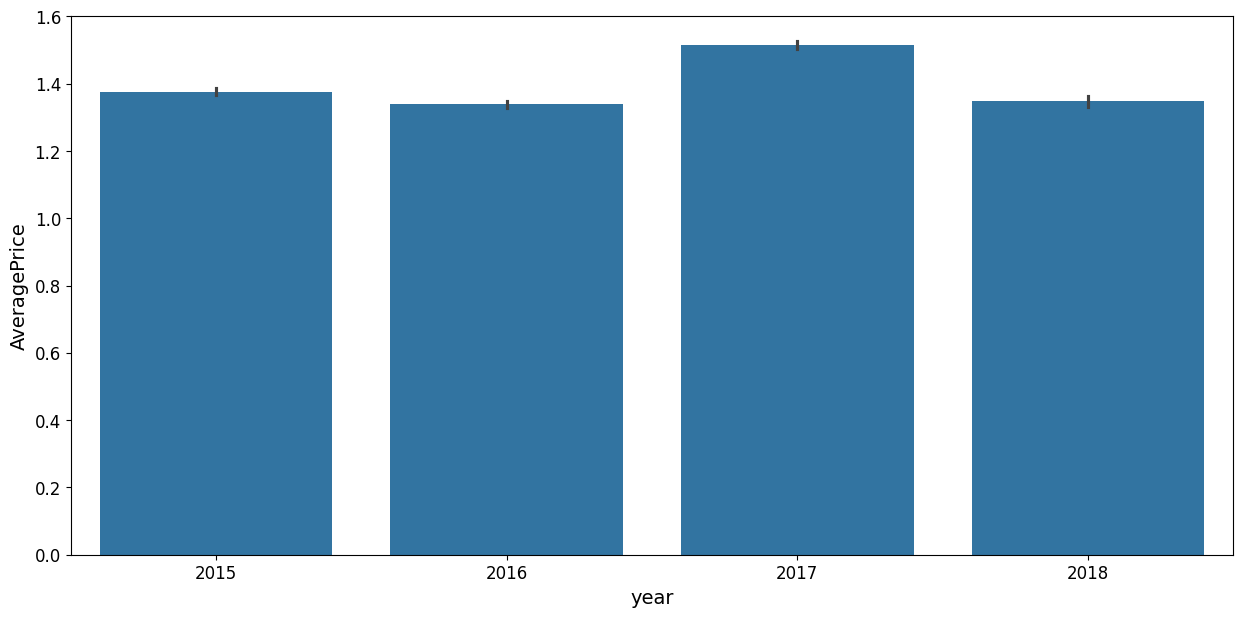

In [17]:
sns.barplot(x='year', y='AveragePrice', data=dataset)

<AxesSubplot: xlabel='month', ylabel='AveragePrice'>

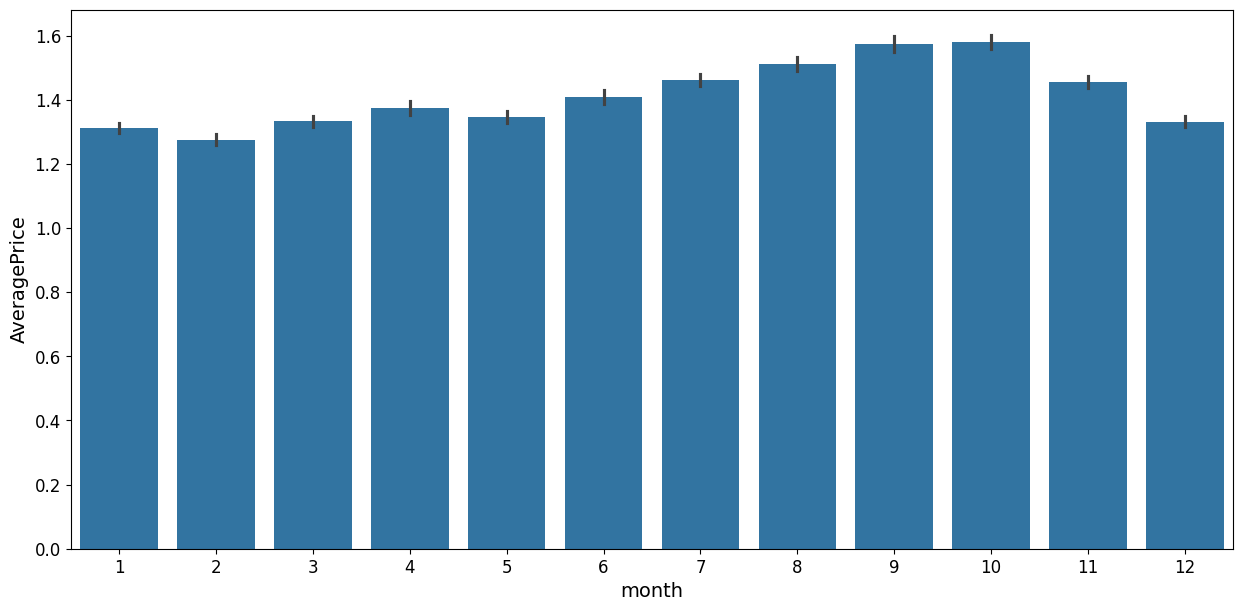

In [18]:
sns.barplot(x='month', y='AveragePrice', data=dataset)

<AxesSubplot: xlabel='month', ylabel='AveragePrice'>

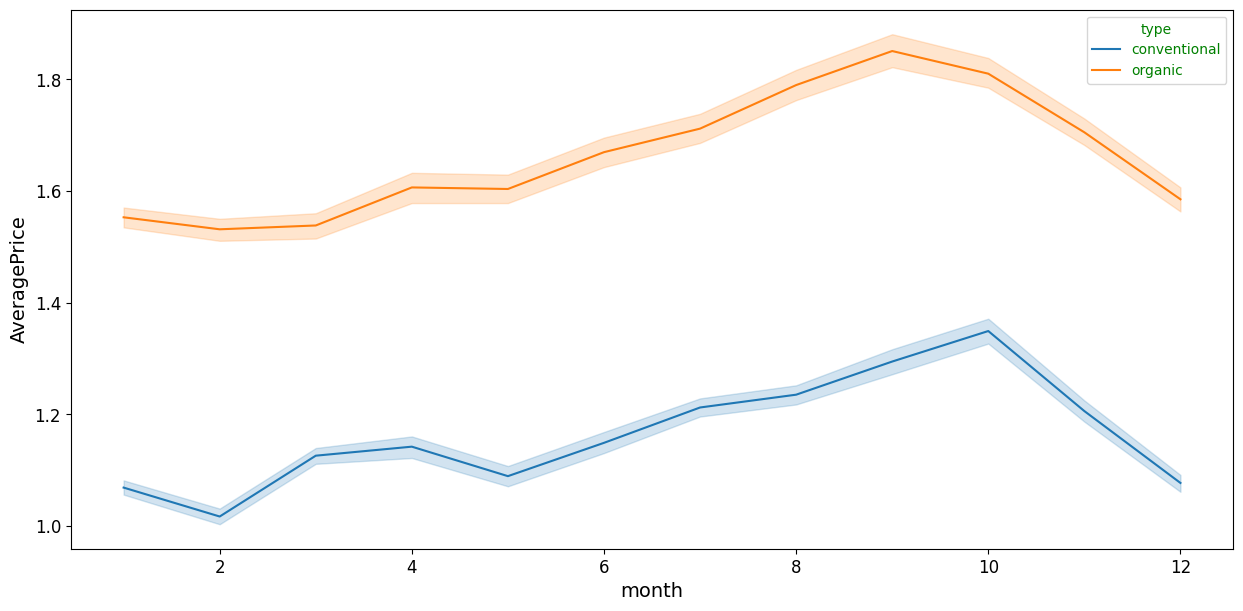

In [19]:
sns.lineplot(x='month', y='AveragePrice', hue='type', data=dataset)

* There is hike between month 8–10 of both type of avocado both for conventional and organic type of avocado.
* Also, the conventional type of avocado is varying in term of price as seen in line plot because in starting the price is high but then it get decrease and so on.

**Plotting Histogram:**
* A histogram shows the frequency on the vertical axis and the horizontal axis is another dimension. Usually it has bins, where every bin has a minimum and maximum value. Each bin also has a frequency between x and infinite
* So, in this we can also check whether the graph is right skewed, left skew or the graph is normally distributed graph

array([[<AxesSubplot: title={'center': 'Date'}>,
        <AxesSubplot: title={'center': 'AveragePrice'}>,
        <AxesSubplot: title={'center': 'Total Volume'}>,
        <AxesSubplot: title={'center': '4046'}>],
       [<AxesSubplot: title={'center': '4225'}>,
        <AxesSubplot: title={'center': '4770'}>,
        <AxesSubplot: title={'center': 'Total Bags'}>,
        <AxesSubplot: title={'center': 'Small Bags'}>],
       [<AxesSubplot: title={'center': 'Large Bags'}>,
        <AxesSubplot: title={'center': 'XLarge Bags'}>,
        <AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'month'}>],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

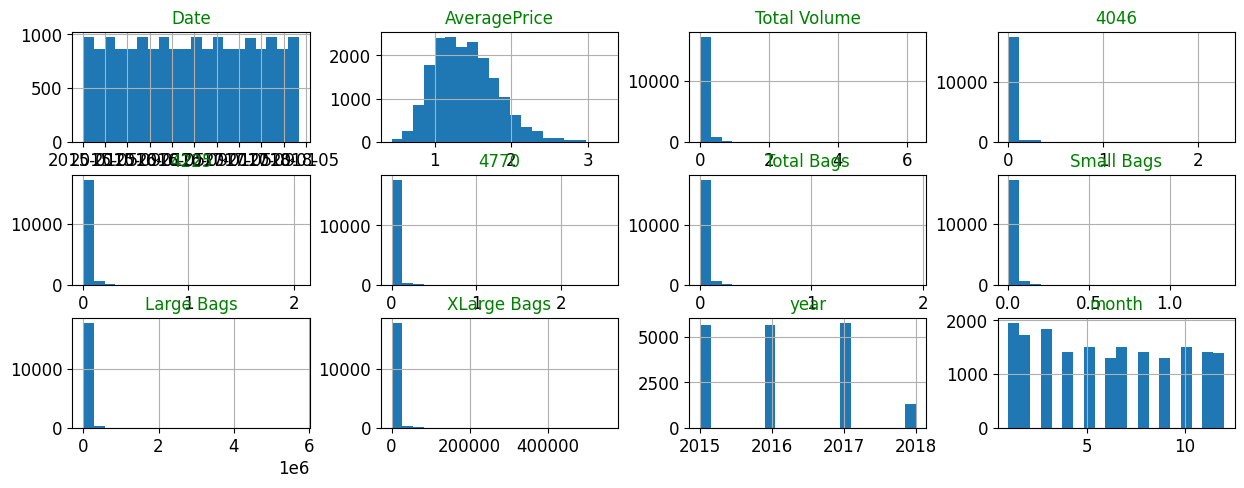

In [20]:
dataset.hist(grid=True,layout=(4,4),bins=20)

For plotting this histogram, we used the bin size as 20, we can take any bin size (suited as per as data).

* Average price column is normally distributing over the histogram.
* Rest of the data are not much varying in term of numbers, so they are almost left skewed data
* To make the column as normal distributed we will use numPy log to make the skew values as normal distributed.

In [21]:
numeric_columns = dataset.select_dtypes(include=['number'])  # Select only numeric columns
skewness = numeric_columns.skew()  # Compute skewness
print(skewness)
numeric_columns.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
month            0.106617
dtype: float64


,0
AveragePrice,0.580303
Total Volume,9.007687
4046,8.648220
4225,8.942466
4770,10.159396
Total Bags,9.756072
Small Bags,9.540660
Large Bags,9.796455
XLarge Bags,13.139751
year,0.215339


In [22]:
skew = ('Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags')
for col in skew:
    if numeric_columns.skew().loc[col]>0.55:
        numeric_columns.skew()[col] = np.log1p(numeric_columns.skew()[col])

The best skew value for normally distributed data is very close to zero, so we are using “log1p” method to make the skew value near to zero

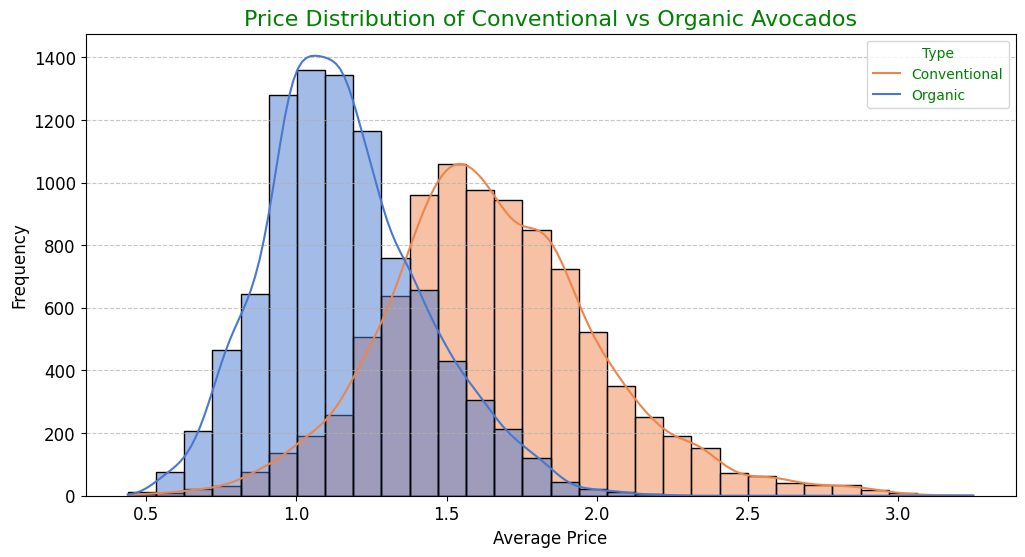

In [23]:
# Let's see the price distribution of two types of avocados.
plt.figure(figsize=(12, 6))
sns.histplot(data=dataset, x='AveragePrice', hue='type', kde=True, bins=30, palette='muted')
plt.title('Price Distribution of Conventional vs Organic Avocados', fontsize=16)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Type', labels=['Conventional', 'Organic'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

So, on average organic avocados are more expensive than conventional.

**Correlation Matrix:**
Correlation Matrix is basically a covariance matrix. A summary measure called the correlation describes the strength of the linear association. Correlation summarizes the strength and direction of the linear (straight-line) association between two quantitative variables. It takes values between -1 (Negative correlated value) and +1 (Positive correlated value).

The higher the value, the strong is the relation and vice versa.

We will use seaborn heatmap to plot the correlated matrix and plot the corr value in the heatmap graph

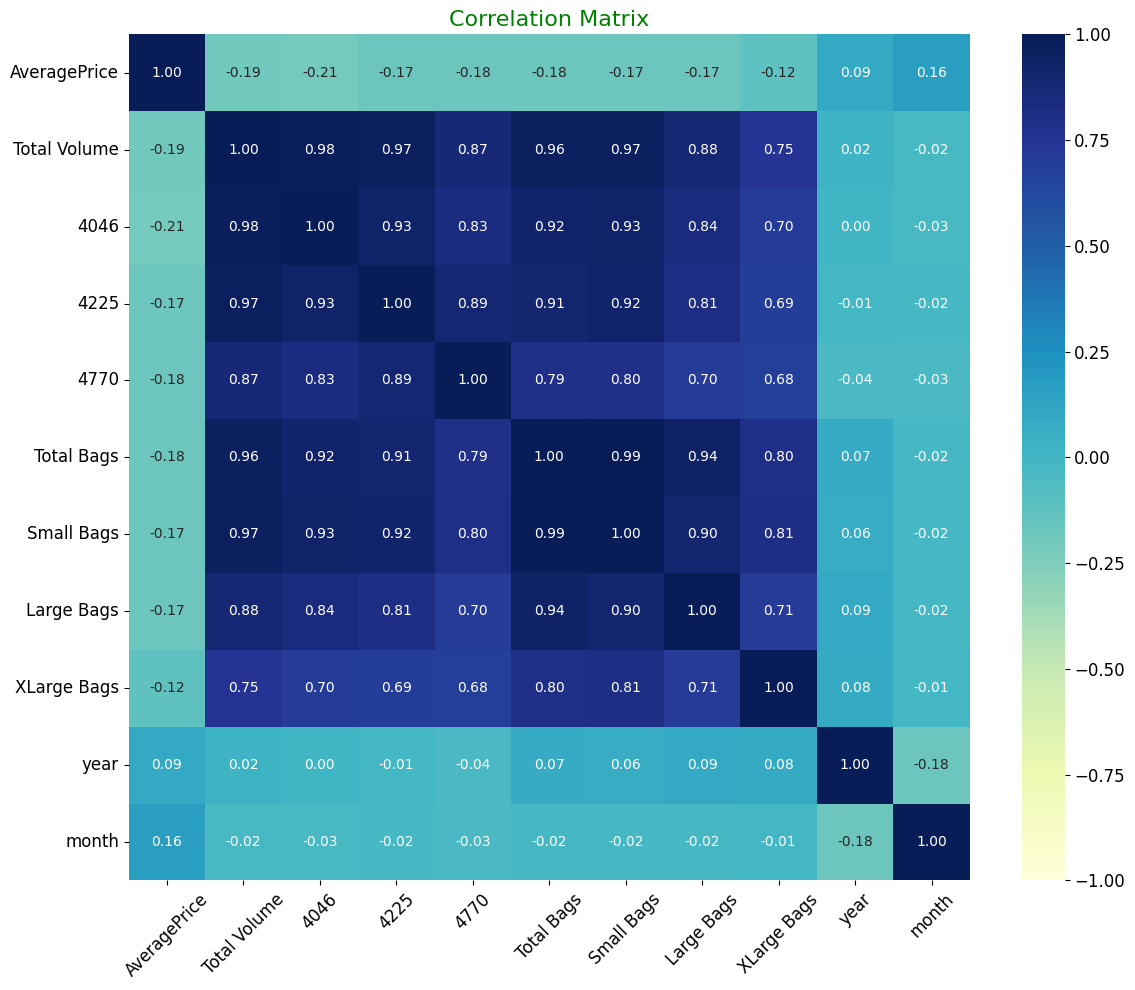

In [24]:
# Compute the correlation matrix
corr = numeric_columns.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, vmin=-1, vmax=1)
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Feature Engineering

In [25]:
# df = dataset
df = dataset.copy()

In [26]:
# Extracting month
df['month'] = df['Date'].dt.month

In [27]:
#Introducing new feature 'season'
df['season'] = df['month']%12 // 3 + 1
# Dec, Jan, Feb = 1 (Winter)
# Mar, Apr, May, = 2 (Spring)
# Jun, Jul, Aug = 3 (Summer)
# Sep, Oct, Nov = 4 (Fall)

In [28]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'month', 'season'],
      dtype='object')

### Train-test splitting

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

**Configuring the split:**

The procedure has one main configuration parameter, which is the size of the train and test sets. This is most commonly expressed as a percentage between 0 and 1 for either the train or test datasets. For example, a training set with the size of 0.67 (67 percent) means that the remainder percentage 0.33 (33 percent) is assigned to the test set.

In [29]:
## Separating out different columns into various categories
target_var = ['AveragePrice']
cols_to_remove = ['AveragePrice','Date','4046','4225','4770','Small Bags','Large Bags','XLarge Bags']
num_cols = ['Total Volume', 'Total Bags', 'year', 'month', 'season']
cat_cols = ['type','region']

In [30]:
## Separating out target variable and removing the non-essential columns
y = df[target_var].values
df.drop(cols_to_remove, axis=1, inplace=True)

The scikit-learn library provides an implementation of the train-test split evaluation procedure via the train_test_split() function.

The function takes a loaded dataset as input and returns the dataset split into two subsets.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
## Splitting into train and test set
df_train, df_test, y_train, y_test = train_test_split(df, y.ravel(), test_size = 0.33, random_state = 13)

In [33]:
df_train.shape, df_test.shape, y_train.shape, y_test.shape

((12226, 7), (6023, 7), (12226,), (6023,))

In [34]:
np.mean(y_train), np.mean(y_test)

(1.4068673319155898, 1.4041739996679397)

### Converting categorical columns to numerical columns

There are many ways to convert categorical values into numerical values. Each approach has its own trade-offs and impact on the feature set. Hereby, we would focus on 2 main methods: Label-Encoding and One-Hot-Encoding. Both of these encoders are part of scikit-learn library and are used to convert text or categorical data into numerical data which the model expects and performs better with.

#### Label Encoding

This approach is very simple and it involves converting each value in a column to a number.

Using **category codes** approach (non-sklearn):

This approach requires the category column to be of 'category' datatype. By default, a non-numerical column is of 'object' type. So we need to change type to 'category' before using this approach.

In [35]:
df_train['type_cat'] = df_train.type.astype('category').cat.codes

In [36]:
df_train.sample(4)

,Total Volume,Total Bags,type,year,region,month,season,type_cat
5534,5556043.02,2346061.42,conventional,2016,West,7,3,0
4281,1212399.97,439765.60,conventional,2016,NewYork,8,3,0
6442,3562841.46,1347372.00,conventional,2017,GreatLakes,5,2,0
7120,1267239.35,515650.75,conventional,2017,NewYork,8,3,0


In [37]:
df_train.drop('type_cat', axis=1, inplace = True)

In [38]:
## The sklearn method
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()

In [40]:
# Label encoding of Type variable
df_train['type'] = le.fit_transform(df_train['type'])

In [41]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'conventional': 0, 'organic': 1}

In [42]:
## What if type column has new values in test set?
le.transform([['organic']])
#le.transform([['ABC']])

array([1])

In [43]:
pd.Series(['ABC']).map(le_name_mapping)

,0
0,NaN


In [44]:
## Encoding type feature for test set
df_test['type'] = df_test.type.map(le_name_mapping)

## Filling missing/NaN values created due to new categorical levels
df_test['type'].fillna(-1, inplace=True)

In [45]:
df_train.type.unique(), df_test.type.unique()

(array([0, 1]), array([0, 1]))

Though label encoding is straight but it has the disadvantage. Depending upon the data values and type of data, label encoding induces a new problem of number sequencing. The problem using the number is that they introduce relation/comparison between them. Apparently, there is no relation between various regions, but when looking at the number, one might think that 'DallasFtWorth' region has higher precedence over 'NewYork' region. The algorithm might misunderstand that data has some kind of hierarchy/order 0 < 1 < 2 … and might give more weight to 'DallasFtWorth' in calculation then than 'NewYork' region type.

This ordering issue is addressed in another common alternative approach called 'One-Hot Encoding'.

#### One-Hot encoding for categorical variables with multiple levels

In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column.

In [46]:
## The non-sklearn method
t = pd.get_dummies(df_train, prefix_sep = "_", columns = ['region'])
t.head()

,Total Volume,Total Bags,type,year,month,season,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
4602,110772.26,48494.33,0,2016,6,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10571,2954.83,2593.33,1,2015,3,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18050,14240.92,8282.77,1,2018,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15847,4296.53,3402.11,1,2017,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8326,32336225.00,10412097.00,0,2017,11,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
## The sklearn method
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

OneHotEncoder from SciKit library only takes numerical categorical values, hence any value of string type should be label encoded before one hot encoded.

In [48]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le_ohe = LabelEncoder()
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [49]:
enc_train = le_ohe.fit_transform(df_train.region).reshape(df_train.shape[0],1)
enc_train.shape

(12226, 1)

In [50]:
np.unique(enc_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [51]:
ohe_train = ohe.fit_transform(enc_train)
ohe_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
le_ohe_name_mapping = dict(zip(le_ohe.classes_, le_ohe.transform(le_ohe.classes_)))
le_ohe_name_mapping

{'Albany': 0,
 'Atlanta': 1,
 'BaltimoreWashington': 2,
 'Boise': 3,
 'Boston': 4,
 'BuffaloRochester': 5,
 'California': 6,
 'Charlotte': 7,
 'Chicago': 8,
 'CincinnatiDayton': 9,
 'Columbus': 10,
 'DallasFtWorth': 11,
 'Denver': 12,
 'Detroit': 13,
 'GrandRapids': 14,
 'GreatLakes': 15,
 'HarrisburgScranton': 16,
 'HartfordSpringfield': 17,
 'Houston': 18,
 'Indianapolis': 19,
 'Jacksonville': 20,
 'LasVegas': 21,
 'LosAngeles': 22,
 'Louisville': 23,
 'MiamiFtLauderdale': 24,
 'Midsouth': 25,
 'Nashville': 26,
 'NewOrleansMobile': 27,
 'NewYork': 28,
 'Northeast': 29,
 'NorthernNewEngland': 30,
 'Orlando': 31,
 'Philadelphia': 32,
 'PhoenixTucson': 33,
 'Pittsburgh': 34,
 'Plains': 35,
 'Portland': 36,
 'RaleighGreensboro': 37,
 'RichmondNorfolk': 38,
 'Roanoke': 39,
 'Sacramento': 40,
 'SanDiego': 41,
 'SanFrancisco': 42,
 'Seattle': 43,
 'SouthCarolina': 44,
 'SouthCentral': 45,
 'Southeast': 46,
 'Spokane': 47,
 'StLouis': 48,
 'Syracuse': 49,
 'Tampa': 50,
 'TotalUS': 51,
 'West

In [53]:
## Encoding Region feature for test set
enc_test = df_test.region.map(le_ohe_name_mapping).ravel().reshape(-1,1)

## Filling missing/NaN values created due to new categorical levels
enc_test[np.isnan(enc_test)] = 9999

In [54]:
np.unique(enc_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [55]:
ohe_test = ohe.transform(enc_test)

In [56]:
### Show what happens when a new value is inputted into the OHE
ohe.transform(np.array([[9999]]))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

#### Adding the one-hot encoded columns to the dataframe and removing the original feature

In [57]:
cols = ['region_' + str(x) for x in le_ohe_name_mapping.keys()]
cols

['region_Albany',
 'region_Atlanta',
 'region_BaltimoreWashington',
 'region_Boise',
 'region_Boston',
 'region_BuffaloRochester',
 'region_California',
 'region_Charlotte',
 'region_Chicago',
 'region_CincinnatiDayton',
 'region_Columbus',
 'region_DallasFtWorth',
 'region_Denver',
 'region_Detroit',
 'region_GrandRapids',
 'region_GreatLakes',
 'region_HarrisburgScranton',
 'region_HartfordSpringfield',
 'region_Houston',
 'region_Indianapolis',
 'region_Jacksonville',
 'region_LasVegas',
 'region_LosAngeles',
 'region_Louisville',
 'region_MiamiFtLauderdale',
 'region_Midsouth',
 'region_Nashville',
 'region_NewOrleansMobile',
 'region_NewYork',
 'region_Northeast',
 'region_NorthernNewEngland',
 'region_Orlando',
 'region_Philadelphia',
 'region_PhoenixTucson',
 'region_Pittsburgh',
 'region_Plains',
 'region_Portland',
 'region_RaleighGreensboro',
 'region_RichmondNorfolk',
 'region_Roanoke',
 'region_Sacramento',
 'region_SanDiego',
 'region_SanFrancisco',
 'region_Seattle',
 're

In [58]:
## Adding to the respective dataframes
df_train = pd.concat([df_train.reset_index(), pd.DataFrame(ohe_train, columns = cols)], axis = 1).drop(['index'], axis=1)
df_test = pd.concat([df_test.reset_index(), pd.DataFrame(ohe_test, columns = cols)], axis = 1).drop(['index'], axis=1)

In [59]:
pd.DataFrame(ohe_train, columns = cols)

,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12221,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12223,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [60]:
df_train

,Total Volume,Total Bags,type,year,region,month,season,region_Albany,region_Atlanta,region_BaltimoreWashington,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,110772.26,48494.33,0,2016,Pittsburgh,6,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2954.83,2593.33,1,2015,NewOrleansMobile,3,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14240.92,8282.77,1,2018,RaleighGreensboro,2,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4296.53,3402.11,1,2017,Jacksonville,2,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32336225.00,10412097.00,0,2017,TotalUS,11,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12221,657741.34,173858.50,0,2015,BaltimoreWashington,1,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12222,255913.63,79068.14,0,2015,HarrisburgScranton,5,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12223,437377.75,57210.66,0,2015,Atlanta,7,3,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12224,3696.52,3316.18,1,2016,Syracuse,5,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [61]:
## Drop the region column
df_train.drop(['region'], axis = 1, inplace=True)
df_test.drop(['region'], axis = 1, inplace=True)

In [62]:
df_train.head()

,Total Volume,Total Bags,type,year,month,season,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,110772.26,48494.33,0,2016,6,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2954.83,2593.33,1,2015,3,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14240.92,8282.77,1,2018,2,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4296.53,3402.11,1,2017,2,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32336225.00,10412097.00,0,2017,11,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Though this approach eliminates the hierarchy/order issues but does have the downside of adding more columns to the data set. It can cause the number of columns to expand greatly if you have many unique values in a category column. In our case, it was manageable, but it will get really challenging to manage when encoding gives many columns.

## Regression Modeling

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Pipeline sequentially applies a list of transforms and a final estimator. The intermediate steps of pipeline must implement fit and transform methods and the final estimator only needs to implement fit.

As the name suggests, pipeline class allows sticking multiple processes into a single scikit-learn estimator. pipeline class has fit, predict and score method just like any other estimator (ex. LinearRegression). Pipeline can be necessary at times as it helps to enforce desired order of application steps, creating a convenient work-flow, which makes sure of the reproducibility of the work.

We will be using StandardScaler, which subtracts the mean from each features and then scale to unit variance.

In [64]:
pipe0 = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe0.fit(df_train, y_train)
y_pred0 = pipe0.predict(df_test)
print("R2: {}".format(r2_score(y_test, y_pred0)))
print("MAE: {}".format(mean_absolute_error(y_test, y_pred0)))

R2: 0.6149448220225784
MAE: 0.19015866941097048


In [65]:
pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
pipe.fit(df_train, y_train)
y_pred = pipe.predict(df_test)
print("R2: {}".format(r2_score(y_test, y_pred)))
print("MAE: {}".format(mean_absolute_error(y_test, y_pred)))

R2: 0.9008966077281925
MAE: 0.08883028391167191


In [66]:
rf = RandomForestRegressor()
rf.fit(df_train, y_train)
len(rf.estimators_)

100

In [67]:
rf.estimators_[0].tree_.max_depth

47

In [68]:
rf = RandomForestRegressor(n_estimators=100, max_depth=3)
rf.fit(df_train, y_train)

RandomForestRegressor(max_depth=3)

In [69]:
from sklearn import tree

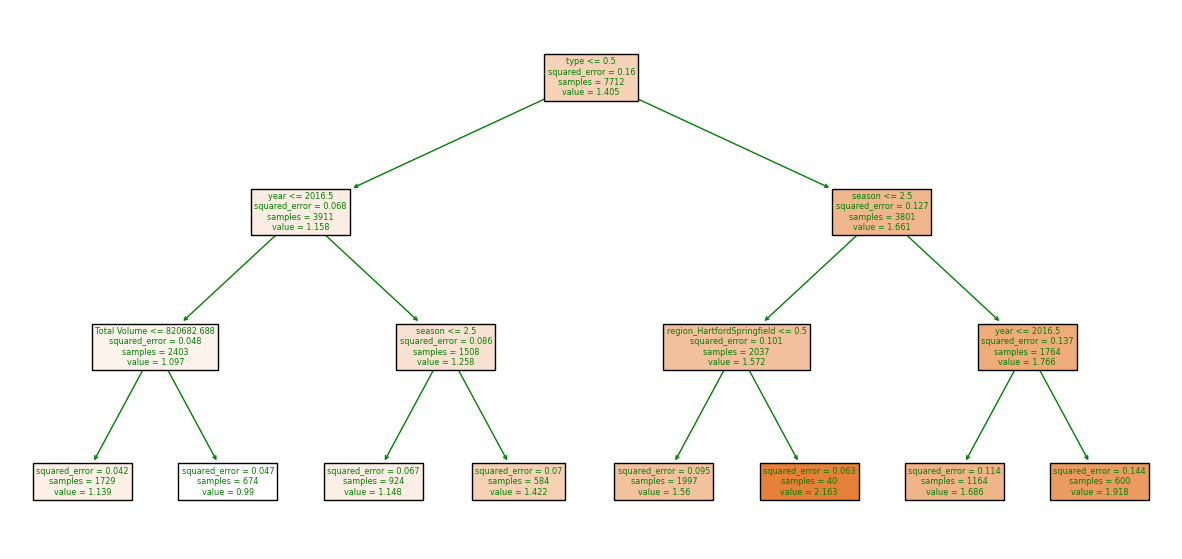

In [70]:
_ = tree.plot_tree(rf.estimators_[0], feature_names=df_train.columns, filled=True)

In [71]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_train)
X_test_scaled = scaler.transform(df_test)

model = XGBRegressor()
model.fit(X_train_scaled, y_train)
y_pred2 = model.predict(X_test_scaled)

print("R2: {}".format(r2_score(y_test, y_pred2)))
print("MAE: {}".format(mean_absolute_error(y_test, y_pred2)))

R2: 0.8966130978627679
MAE: 0.09412199142840975


## Time Series Forecasting

Time series is a sequence of observations recorded at regular time intervals.

Depending on the frequency of observations, a time series may typically be hourly, daily, weekly, monthly, quarterly and annual. Sometimes, you might have seconds and minute-wise time series as well, like, number of clicks and user visits every minute etc.

Forecasting is the step where you want to predict the future values the series is going to take. Forecasting a time series (like demand and sales) is often of tremendous commercial value.

**Time Series Components:**

A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components. A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

A series is thought to be an aggregate or combination of these four components. All series have a level and noise. The trend and seasonality components are optional.

It is helpful to think of the components as combining either additively or multiplicatively.

We will focus on a particular type of forecasting method called ARIMA modeling.

### ARIMA

ARIMA, short for 'Auto Regressive Integrated Moving Average' is a forecasting algorithm that 'explains' a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

Any 'non-seasonal' time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

An ARIMA model is characterized by 3 terms: p, d, q:

* p is the order of the AR term

* d is the number of differencing required to make the time series stationary

* q is the order of the MA term

The first step to build an ARIMA model is to **make the time series stationary**. Why?

Because, term 'Auto Regressive' in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as you know, work best when the predictors are not correlated and are independent of each other.

How to make a series stationary?

The most common approach is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.

**d** is the minimum number of differencing needed to make the series stationary. And if the time series is already stationary, then d = 0.

A pure **Auto Regressive (AR only) model** is one where Yt depends only on its own lags. And, **p** is the order of the 'Auto Regressive' (AR) term. It refers to the number of lags of Y to be used as predictors.

A pure **Moving Average (MA only) model** is one where Yt depends only on the lagged forecast errors. And, **q** is the order of the 'Moving Average' (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

**ARIMA model in words:**

Predicted Yt = Constant + Linear combination of Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

##### Choose parameters for ARIMA

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
df_ar = pd.read_csv(file_path, index_col=0)
df_ar['Date'] = pd.to_datetime(df_ar['Date'])  # Convert to datetime format
df_ar.set_index('Date', inplace=True)  # Set date as index
df_ar = df_ar[['AveragePrice']]  # Select only "AveragePrice" column
df_ar = df_ar.resample('W').mean() # Get weekly mean values for Average Price

In [78]:
df_ar.head()

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037


<AxesSubplot: xlabel='Date'>

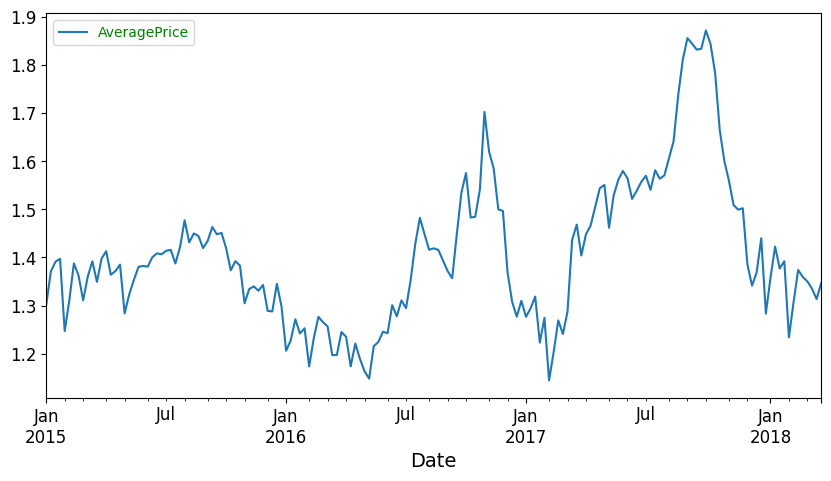

In [79]:
plt.rcParams['figure.figsize'] = [10, 5]
df_ar.plot()

As we can see from the plot, avocado prices were relatively flat for 2015 and much of 2016.  It wasn’t until the middle of 2016 that there were "large" swings in prices that were duplicated again in 2017.

**Let's look at the components of our time series:**

We will use additive model, which suggests that the components are added together as follows:

> Yt = Level + Trend + Seasonality + Noise

An additive model is linear where changes over time are consistently made by the same amount.

In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose

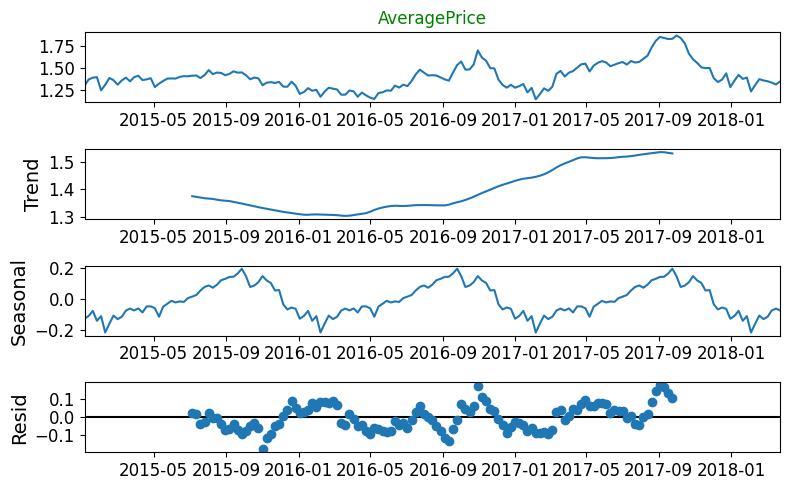

In [81]:
plt.rcParams['figure.figsize'] = [8, 5]
a = seasonal_decompose(df_ar["AveragePrice"], model = "add")
a.plot()
plt.ioff()

##### Find order of differencing i.e. 'd':

The purpose of differencing it to make the time series stationary.

But we need to be careful to not over-difference the series. Because, an over differenced series may still be stationary, which in turn will affect the model parameters.

First, we will check stationarity using Augmented Dickey Fuller Test. The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

In [82]:
from statsmodels.tsa.stattools import adfuller

In [83]:
result = adfuller(df_ar.AveragePrice.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.357817
p-value: 0.153998


Since p-value is greater than the significance level, let’s difference the series and see how the autocorrelation plot looks like.

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

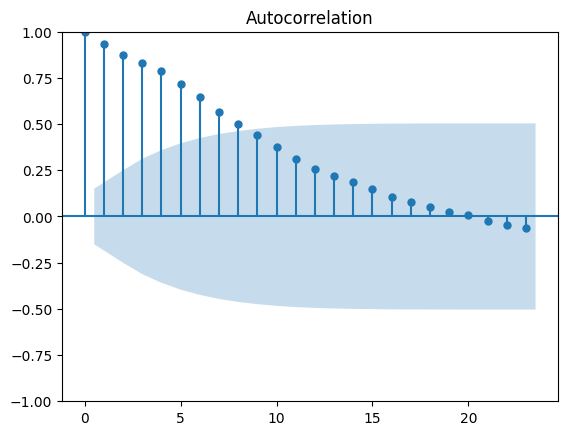

In [85]:
plt.style.use('default')
plot_acf(df_ar.AveragePrice);
plt.show()

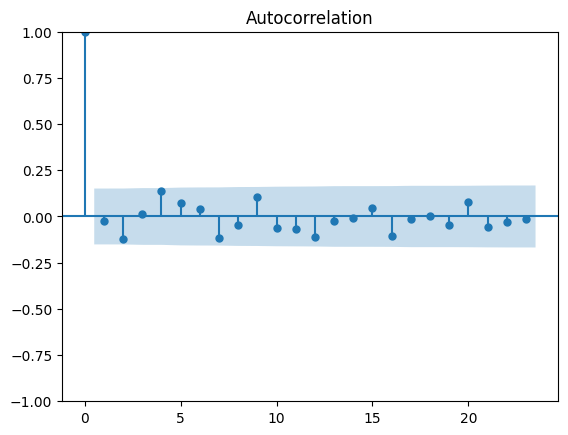

In [86]:
# 1st order differencing
plot_acf(df_ar.AveragePrice.diff().dropna());
plt.show()

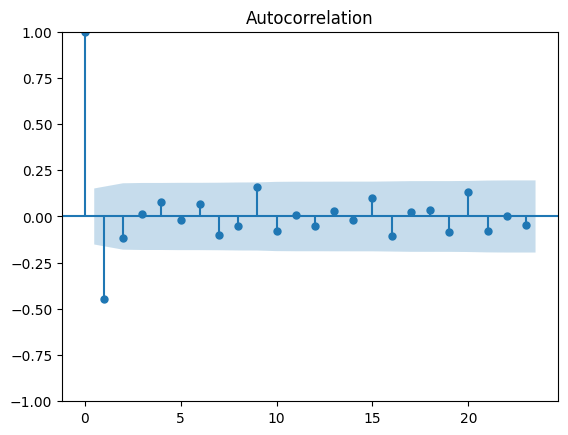

In [87]:
# 2nd order differencing
plot_acf(df_ar.AveragePrice.diff().diff().dropna());
plt.show()

In [88]:
!pip show pmdarima

Name: pmdarima
Version: 2.0.3
Summary: Python's forecast::auto.arima equivalent
Home-page: http://alkaline-ml.com/pmdarima
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: Cython, joblib, numpy, pandas, scikit-learn, scipy, setuptools, statsmodels, urllib3
Required-by: 


From above plots we can see that the time series reaches stationarity with one order of differencing.

We can also use 'ndiffs' to estimate 'd'. It performs a test of stationarity for different levels of d to estimate the number of differences required to make a given time series stationary. It will select the maximum value of d for which the time series is judged stationary by the statistical test.

In [89]:
from pmdarima.arima.utils import ndiffs

In [90]:
## Adf Test
ndiffs(df_ar.AveragePrice, test='adf')

1

##### Find order of AR term i.e. 'p':

The next step is to identify if the model needs any AR terms. You can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot. Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags.

Let's see how partial autocorrelation plots look like.

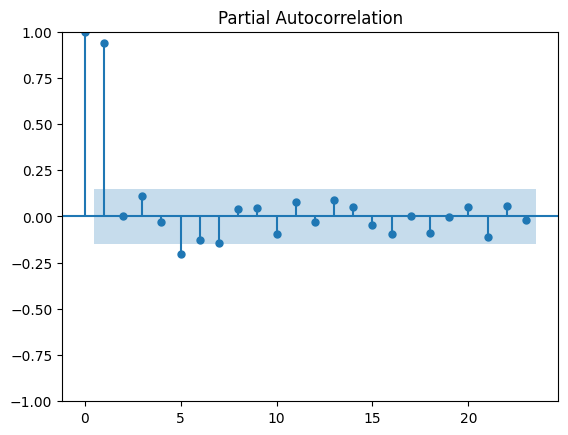

In [91]:
plot_pacf(df_ar.AveragePrice);
plt.show()

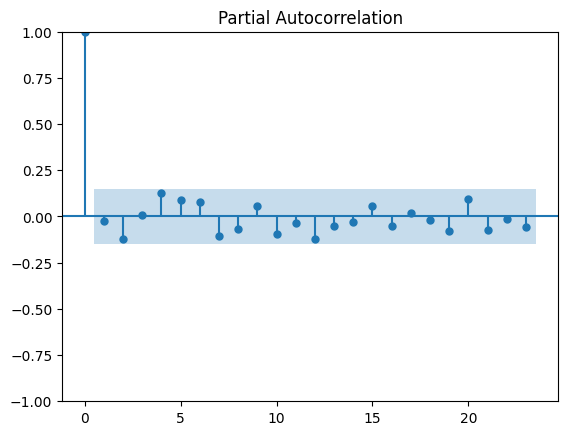

In [92]:
# 1st order differencing
plot_pacf(df_ar.AveragePrice.diff().dropna());
plt.show()

We can observe that the PACF without any lag is quite significant and well within the significance limit (blue region).So we will choose p as 0.

##### Find order of MA term i.e. 'q':

Just like how we looked at the PACF plot for the number of AR terms, you can look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

Let’s see the autocorrelation plot of the differenced series.

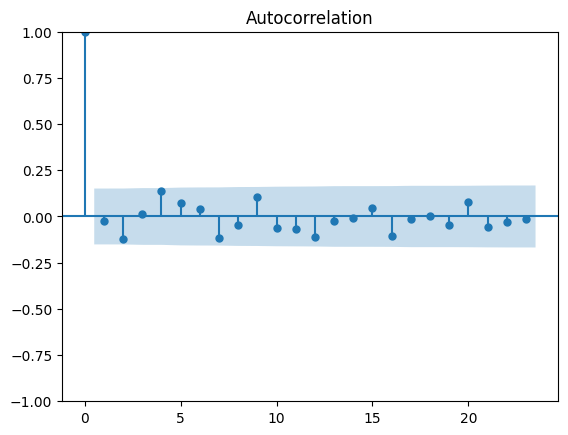

In [93]:
plot_acf(df_ar.AveragePrice.diff().dropna());
plt.show()

The lags are well within the significance limit. So, we wil choose q as 0.

### Build ARIMA Model

In [94]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [95]:
# evaluate an ARIMA model for a given order (p,d,q)
# It finds the model with the best p, d, q-values that yield the lowest MSE.
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)

    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    return best_cfg


In [96]:
# evaluate parameters
p_values = range(1, 2)
d_values = range(0, 4)
q_values = range(0, 2)

best_order = evaluate_models(df_ar.values, p_values, d_values, q_values)

Best ARIMANone MSE=inf


In [100]:
from pmdarima import auto_arima

# Use auto_arima to find the best order
best_model = auto_arima(df_ar['AveragePrice'], seasonal=False, trace=True)
best_order = best_model.order
print(f"Best order: {best_order}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-505.210, Time=1.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-501.413, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-499.504, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-499.534, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-503.409, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-497.514, Time=0.57 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-498.061, Time=0.79 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-498.702, Time=1.40 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-499.712, Time=1.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-497.938, Time=0.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-498.135, Time=1.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-497.379, Time=1.00 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-493.810, Time=1.32 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-507.727, Time=1.11 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [101]:
from statsmodels.tsa.arima.model import ARIMA

# Replace (p, d, q) with the actual order
best_order = (2, 1, 2)

# Instantiate the ARIMA model
model = ARIMA(df_ar['AveragePrice'], order=best_order)

# Fit the model
results_ARIMA = model.fit()

# Predict results
predictions = round(results_ARIMA.predict(), 2)

# Prepare predictions DataFrame
preds = pd.DataFrame(list(zip(list(predictions.index), list(predictions))),
                     columns=['Date', 'PredictedPrice']).set_index('Date')

# Combine predictions with the original data
predicted_df = pd.merge(df_ar[1:], preds, left_index=True, right_index=True)

In [102]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           AveragePrice   No. Observations:                  169
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 258.864
Date:                Sat, 11 Jan 2025   AIC                           -507.727
Time:                        19:42:00   BIC                           -492.107
Sample:                    01-04-2015   HQIC                          -501.388
                         - 03-25-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5803      0.036     15.986      0.000       0.509       0.651
ar.L2         -0.9737      0.032    -30.416      0.000      -1.036      -0.911
ma.L1         -0.6227      0.048    -13.090      0.000      -0.716      -0.529
ma.L2          0.9472      0.047     19.988      0.000       0.854       1.040
sigma2         0.0027      0.000      9.949      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 8.91
Prob(Q):                              0.92   Prob(JB):                         0.01
Heteroskedasticity (H):               1.82   Skew:                            -0.42
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

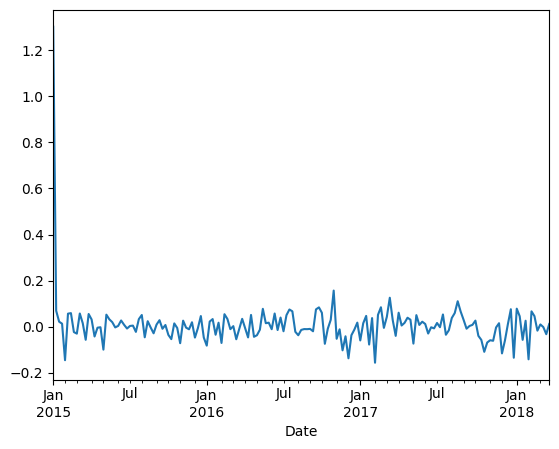

In [103]:
# line plot of residuals
residuals = results_ARIMA.resid
residuals.plot()
plt.show()

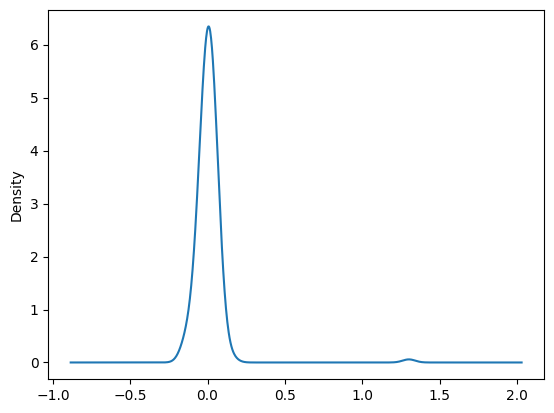

In [104]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

The residual errors seem fine with near zero mean and uniform variance.

In [105]:
print(residuals.describe())

count    169.000000
mean       0.007912
std        0.112709
min       -0.156001
25%       -0.029848
50%        0.003422
75%        0.033307
max        1.301296
dtype: float64


### Forecasting and Evaluation

Let's plot the actuals against the fitted values using plot_predict(). When you set "dynamic" as 'False', the in-sample lagged values are used for prediction.

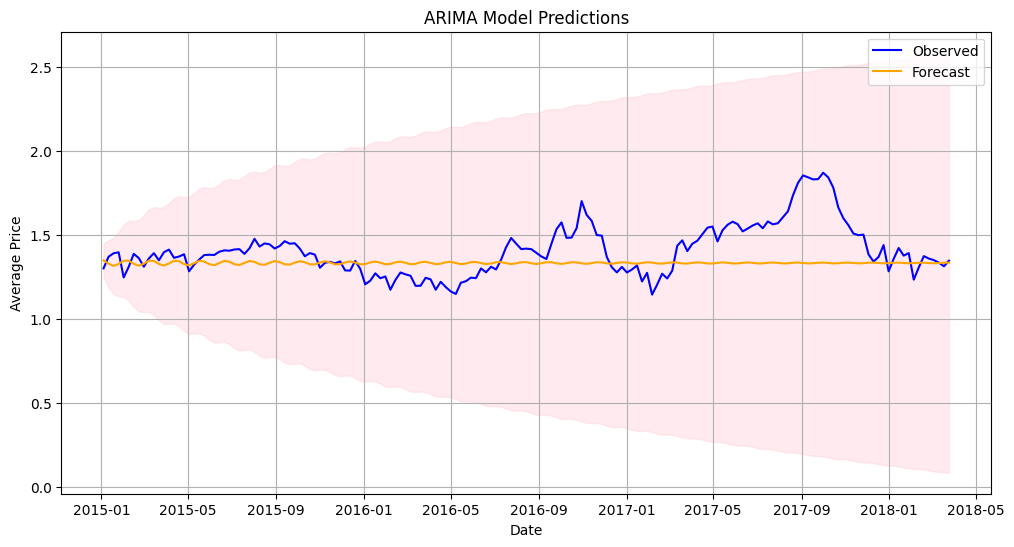

In [107]:
# Get predictions
forecast = results_ARIMA.get_forecast(steps=len(df_ar))
forecast_index = df_ar.index

# Get confidence intervals
confidence_intervals = forecast.conf_int()

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(df_ar.index, df_ar['AveragePrice'], label='Observed', color='blue')

# Plot predictions
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='orange')

# Plot confidence intervals
plt.fill_between(forecast_index,
                 confidence_intervals.iloc[:, 0],  # Lower bound
                 confidence_intervals.iloc[:, 1],  # Upper bound
                 color='pink', alpha=0.3)

# Add labels and legend
plt.title("ARIMA Model Predictions")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.legend()
plt.grid()

plt.show()

In [108]:
print("\tMean Absolute Percentage Error:",
      np.mean(np.abs(predicted_df['PredictedPrice'] - predicted_df['AveragePrice'])/np.abs(predicted_df['AveragePrice'])))
print("\tMean Absolute Error:",
      mean_absolute_error(predicted_df['AveragePrice'], predicted_df['PredictedPrice']))
print("\tMean Squared Error:",
      mean_squared_error(predicted_df['AveragePrice'], predicted_df['PredictedPrice']))
print("\tRoot Mean Squared Error:",
      np.sqrt(mean_squared_error(predicted_df['AveragePrice'],predicted_df['PredictedPrice'])))
print("\tR2 Score:",
      r2_score(predicted_df['AveragePrice'], predicted_df['PredictedPrice']))

	Mean Absolute Percentage Error: 0.02876866586623673
	Mean Absolute Error: 0.039793618858065885
	Mean Squared Error: 0.0027045579101692353
	Root Mean Squared Error: 0.05200536424417423
	R2 Score: 0.8821603604310221


In [111]:
df_ar.index = pd.to_datetime(df_ar.index)

Around 2.9% MAPE implies the model is 97.1% accurate in making predictions.

The problem with plain ARIMA model is it does not support seasonality.

### SARIMA

If your time series has defined seasonality, then, go for SARIMA which uses seasonal differencing.

Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, you subtract the value from previous season.

So, the model will be represented as SARIMA(p,d,q)x(P,D,Q), where, P, D and Q are SAR, order of seasonal differencing and SMA terms respectively and 'x' is the frequency of the time series.

If your model has well defined seasonal patterns, then enforce D=1 for a given frequency 'x'.

In [113]:
import statsmodels.api as sm

In [114]:
mod = sm.tsa.statespace.SARIMAX(df_ar['AveragePrice'],
                                order=(1, 0, 0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.11214D+00    |proj g|=  3.70822D+00

At iterate    5    f= -1.17363D+00    |proj g|=  4.69954D-01

At iterate   10    f= -1.20230D+00    |proj g|=  3.16028D-01

At iterate   15    f= -1.22537D+00    |proj g|=  2.06153D+00

At iterate   20    f= -1.23754D+00    |proj g|=  2.31111D-02

At iterate   25    f= -1.23757D+00    |proj g|=  3.59508D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     42      1     0     0   

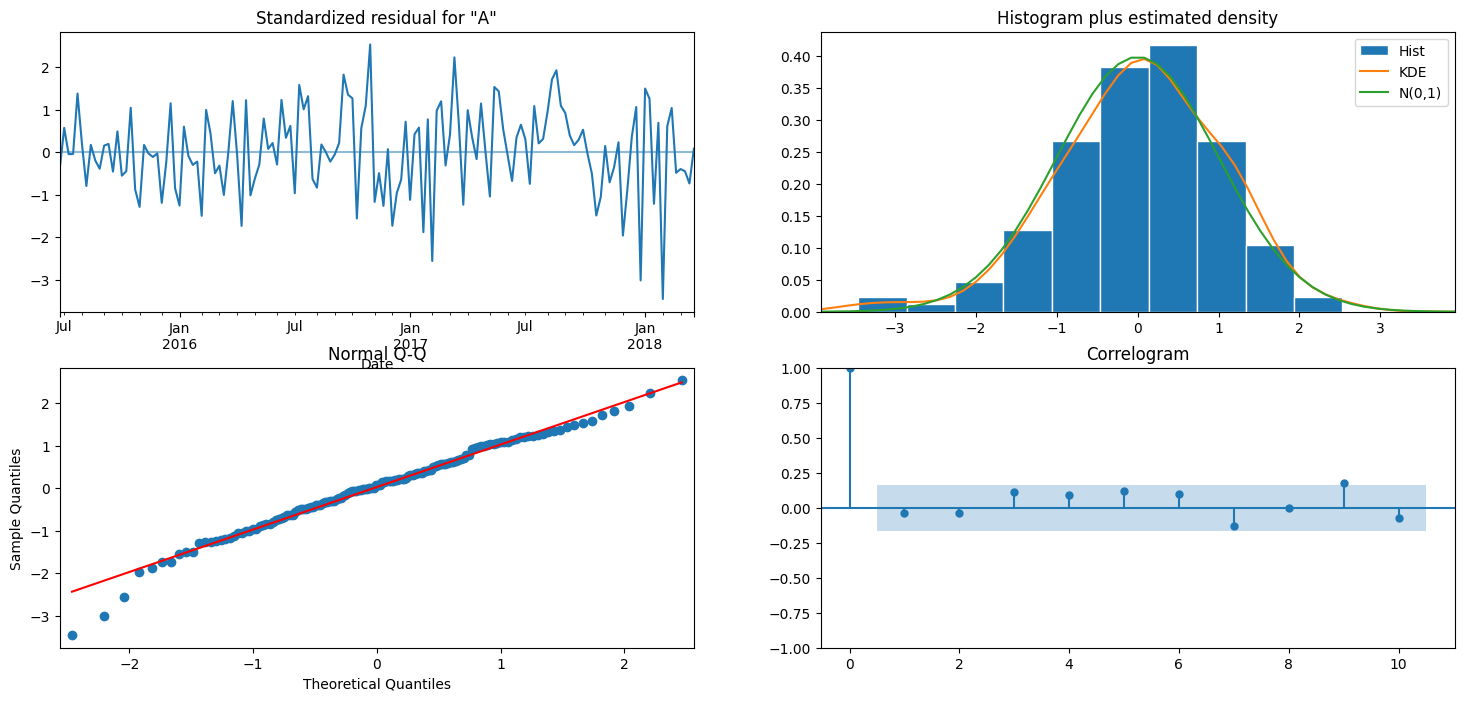

In [115]:
results.plot_diagnostics(figsize=(18, 8))
plt.ioff()
plt.show()

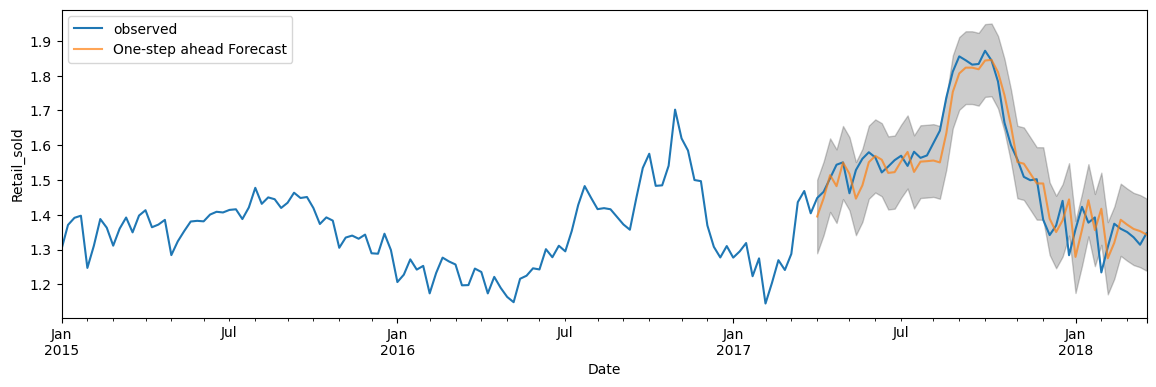

In [116]:
pred = results.get_prediction(start=pd.to_datetime('2017-04-02'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_ar['AveragePrice'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()

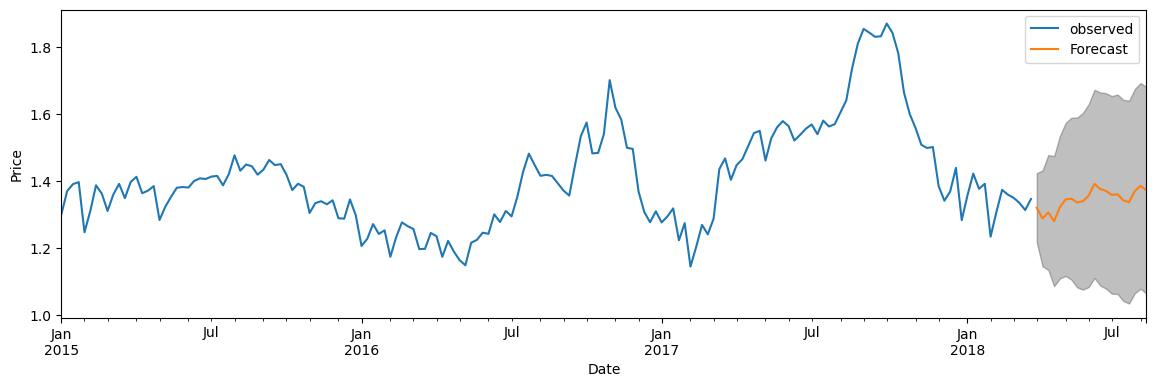

In [117]:
pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = df_ar['AveragePrice'].plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

## Forecasting using Facebook Prophet

Install Prophet using either command prompt or Anaconda prompt using pip:

**pip install fbprophet**

We need to install plotly for plotting the data for prophet

**pip install plotly**

Prophet is an open-source library designed for making forecasts for univariate (one variable) time series datasets. It is easy to use and designed to automatically find a good set of hyperparameters for the model in an effort to make skillful forecasts for data with trends and seasonal structure by default. It was initially developed for the purpose of creating high quality business forecasts. It helps businesses understand and possibly predict the market. This library tries to address the following difficulties common to many business time series:

* Seasonal effects caused by human behavior: weekly, monthly and yearly cycles, dips and peaks on public holidays.
* Changes in trend due to new products and market events.
* Outliers.

It is based on a decomposable additive model where non-linear trends are fit with seasonality, it also takes into account the effects of holidays. Before we head right into coding, let’s learn certain terms that are required to understand this.

**Trend:**
The trend shows the tendency of the data to increase or decrease over a long period of time and it filters out the seasonal variations.

**Seasonality:**
Seasonality is the variations that occur over a short period of time and is not prominent enough to be called a “trend”.

**Understanding the Prophet Model:**
The general idea of the model is similar to a generalized additive model. The “Prophet Equation” fits, as mentioned above, trend, seasonality and holidays. This is given by,

    y(t) = g(t)+s(t)+h(t)+e(t)
    
where,

* g(t) refers to trend (changes over a long period of time)
* s(t) refers to seasonality (periodic or short term changes)
* h(t) refers to effects of holidays to the forecast
* e(t) refers to the unconditional changes that is specific to a business or a person or a circumstance. It is also called the error term.
* y(t) is the forecast.

In [118]:
!pip install fbprophet plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (fbprophet)


Input to Prophet is a dataframe which must have a specific format. The first column must have the name 'ds' while the second column must have the name 'y'.

ds is ***datestamp column*** and should be as per pandas datetime format, YYYY-MM-DD or YYYY-MM-DD HH:MM:SS for a timestamp.

y is the ***numeric column we want to predict or forecast***.

This means we change the column names in the dataset. It also requires that the first column be converted to date-time objects, if they are not already.

In [119]:
import numpy as np
import pandas as pd

from prophet import Prophet
from prophet.plot import plot_plotly
from prophet.plot import add_changepoints_to_plot

import matplotlib.pyplot as plt

In [120]:
df_pr = pd.read_csv(file_path, index_col=0)
df_pr['Date'] = pd.to_datetime(df_pr['Date'])
df_pr.set_index('Date', inplace=True)

In [121]:
df2_week = df_pr[["AveragePrice"]].copy()
df2_week = df_pr.groupby('Date')[['AveragePrice']].mean()
df2_week.reset_index(inplace=True)
df2_week.columns = ['ds','y']
df2_week.head()

,ds,y
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037


In [122]:
df2_week.shape

(169, 2)

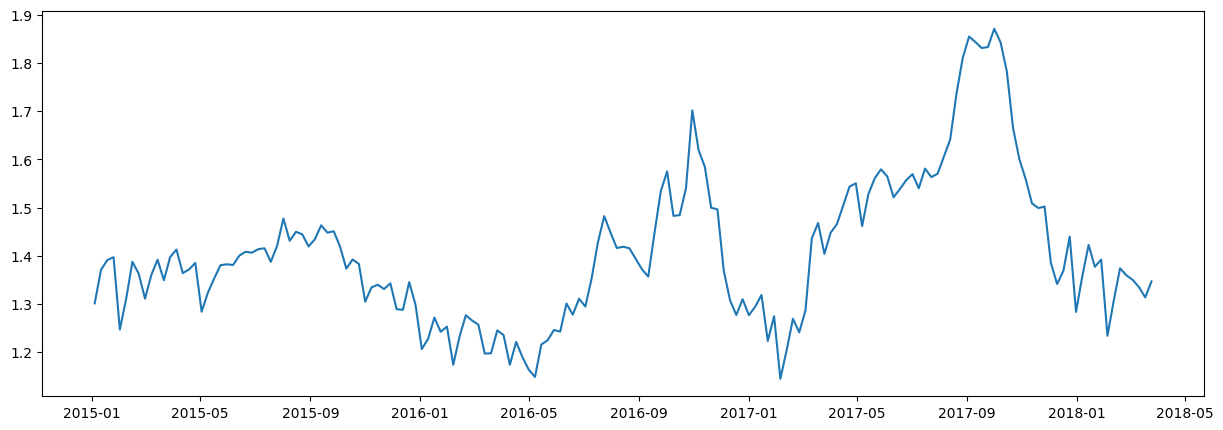

In [123]:
fig = plt.figure(figsize = (15,5))
plt.plot(df2_week.ds, df2_week.y)
plt.show()

In [124]:
# Resample from weekly to monthly
df2_month = df_pr[["AveragePrice"]].resample('MS').mean()
df2_month.head()

,AveragePrice
Date,
2015-01-01,1.365046
2015-02-01,1.326944
2015-03-01,1.361981
2015-04-01,1.383449
2015-05-01,1.344685


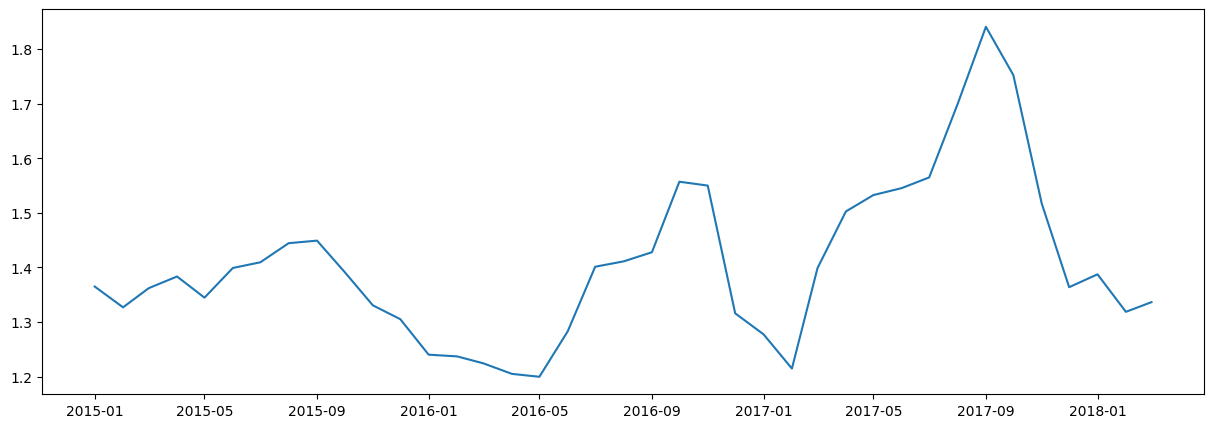

In [125]:
fig = plt.figure(figsize = (15,5))
plt.plot(df2_month.index, df2_month.AveragePrice)
plt.show()

In [126]:
df2_month.reset_index(inplace=True)
df2_month.columns = ['ds','y']

### Fit Prophet Model

Prophet's API is very similar to the one you can find in sklearn. To use Prophet for forecasting, first, a Prophet() object is defined and configured, then it is fit on the dataset by calling the fit() function and passing the data, and, finally, make a forecast.

The Prophet() object takes arguments to configure the type of model you want, such as the type of growth, the type of seasonality, and more. By default, the model will work hard to figure out almost everything automatically.

The fit() function takes a DataFrame of time series data.

In [127]:
df2_week.shape

(169, 2)

In [128]:
# Split data 70-30
prediction_size = 50
train_dataset = df2_week[:-prediction_size]
test_dataset = df2_week[-prediction_size:]

Now we need to create a new Prophet object. Here we can pass the parameters of the model into the constructor. Intially, we will use the defaults. Then we train our model by invoking its fit method on our training dataset:

In [129]:
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmplng8n8/2ck8x1eb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmplng8n8/u6727031.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60369', 'data', 'file=/tmp/tmpmplng8n8/2ck8x1eb.json', 'init=/tmp/tmpmplng8n8/u6727031.json', 'output', 'file=/tmp/tmpmplng8n8/prophet_modelbuq_z4xp/prophet_model-20250111194744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:47:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:47:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Forecasting

A forecast is made by calling the predict() function and passing a DataFrame that contains one column named 'ds' and rows with date-times for all the intervals to be predicted.

Using the helper method Prophet.make_future_dataframe, we create a dataframe which will contain all dates from the history and also extend into the future for those 50 weeks that we left out before.

In [130]:
future= prophet_basic.make_future_dataframe(periods=prediction_size, freq='W')

# https://rdrr.io/cran/prophet/man/make_future_dataframe.html

# How to set freq:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

In [131]:
forecast = prophet_basic.predict(future)

In [132]:
forecast.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.467602,1.304714,1.444421,1.467602,1.467602,-0.092942,-0.092942,-0.092942,-0.092942,-0.092942,-0.092942,0.0,0.0,0.0,1.374660
1,2015-01-11,1.463968,1.311368,1.447319,1.463968,1.463968,-0.085824,-0.085824,-0.085824,-0.085824,-0.085824,-0.085824,0.0,0.0,0.0,1.378144


The result of the predict() function is a DataFrame that contains many columns. Perhaps the most important columns are the forecast date time ('ds'), the forecasted value ('yhat'), and the lower and upper bounds on the predicted value ('yhat_lower' and 'yhat_upper') that provide uncertainty of the forecast.

In [133]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
164,2018-02-25,1.460777,1.384061,1.540328,1.549168,1.513796,1.583895
165,2018-03-04,1.480226,1.398109,1.554557,1.551756,1.515321,1.587294
166,2018-03-11,1.490216,1.411362,1.569859,1.554344,1.516370,1.590442
167,2018-03-18,1.503878,1.428174,1.580227,1.556931,1.517815,1.594020
168,2018-03-25,1.524657,1.440703,1.604465,1.559519,1.519108,1.597607


### Forecast quality evaluation

In [134]:
# Create comparision dataframe
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df2_week.set_index('ds'))
cmp_df.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2015-01-04,1.374660,1.304714,1.444421,1.301296
2015-01-11,1.378144,1.311368,1.447319,1.370648
2015-01-18,1.374041,1.303579,1.442660,1.391111
2015-01-25,1.350141,1.282982,1.418909,1.397130
2015-02-01,1.318302,1.253122,1.392302,1.247037


In [135]:
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100 * cmp_df['e'] / cmp_df['y']

In [136]:
predicted_part = cmp_df[-prediction_size:]

MAPE is widely used as a measure of prediction accuracy because it expresses error as a percentage and thus can be used in model evaluations on different datasets.

In addition, when evaluating a forecasting algorithm, it may prove useful to calculate MAE (Mean Absolute Error) in order to have a picture of errors in absolute numbers.

In [137]:
# Mean Absolute Percentage Error
mape = np.mean(np.abs(predicted_part['p']))
print('MAPE:', mape)

MAPE: 8.261579026447592


In [138]:
# Mean Absolute Error
mae = np.mean(np.abs(predicted_part['e']))
print('MAE:', mae)

MAE: 0.12840565375333732


### Visualization

The Prophet library has its own built-in tools for visualization that enable us to quickly evaluate the result.

First, there is a method called Prophet.plot that will create a plot of the dataset and overlay the prediction with the upper and lower bounds for the forecast dates:

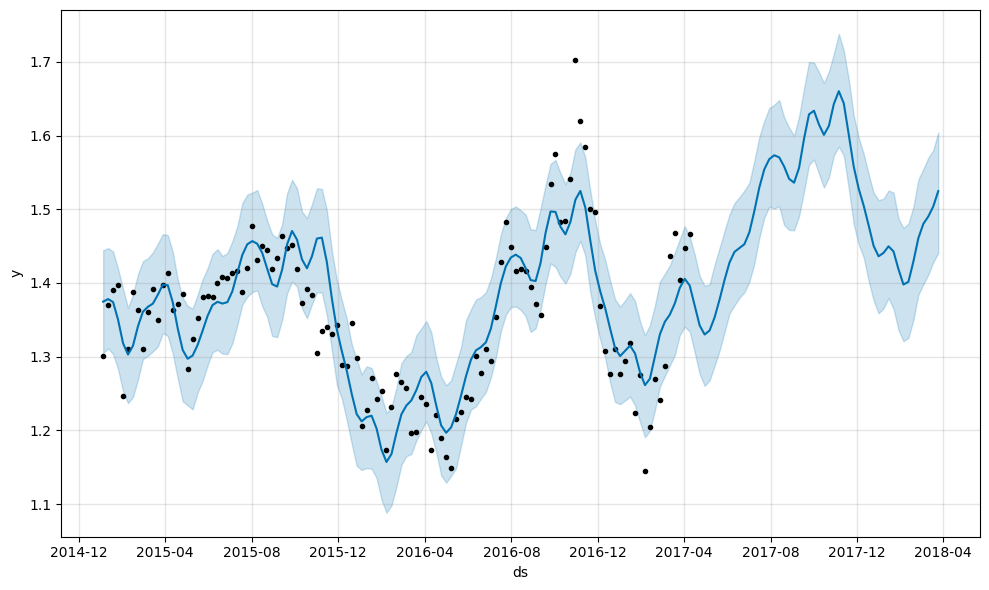

In [139]:
fig1 = prophet_basic.plot(forecast)
plt.show()

The second function Prophet.plot_components might be much more useful in our case. It allows us to observe different components of the model separately: trend, yearly and weekly seasonality. In addition, if you supply information about holidays and events to your model, they will also be shown in this plot.

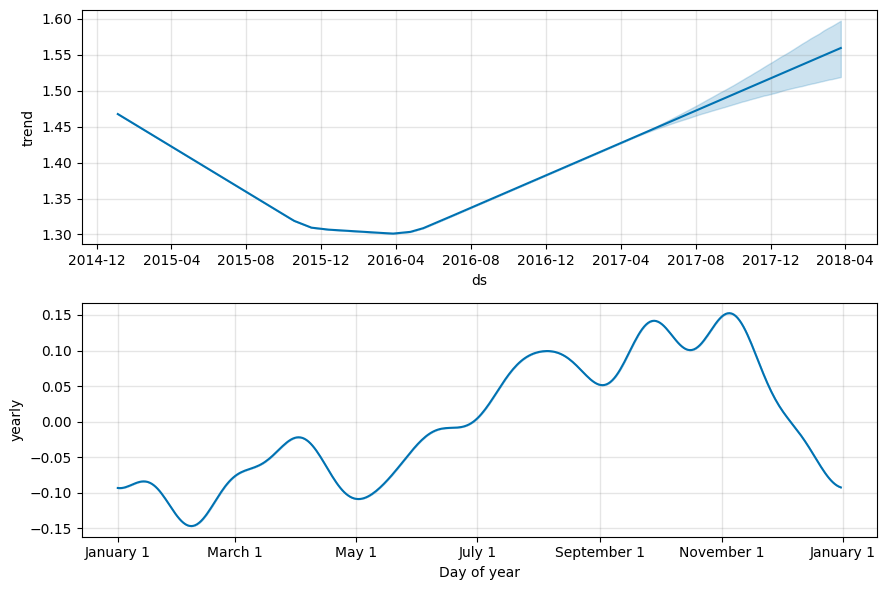

In [140]:
fig1 = prophet_basic.plot_components(forecast)
plt.show()

The above plots shows the trends and seasonality(in a year) of the time series data. We can see there is first decreasing and then an increasing trend, meaning the price of avocado initially dipped and then has increased over time. If we look at the seasonality graph, we can see that September to November have the highest prices at a given year.

### Adding ChangePoints to Prophet

Changepoints are the datetime points where the time series have abrupt changes in the trajectory.

By default, Prophet adds 25 changepoints into the initial 80% of the data-set. The number of changepoints can be set by using the n_changepoints parameter when initializing prophet (e.g., model=Prophet(n_changepoints=30)).

Let’s plot the vertical lines where the potential changepoints occurred

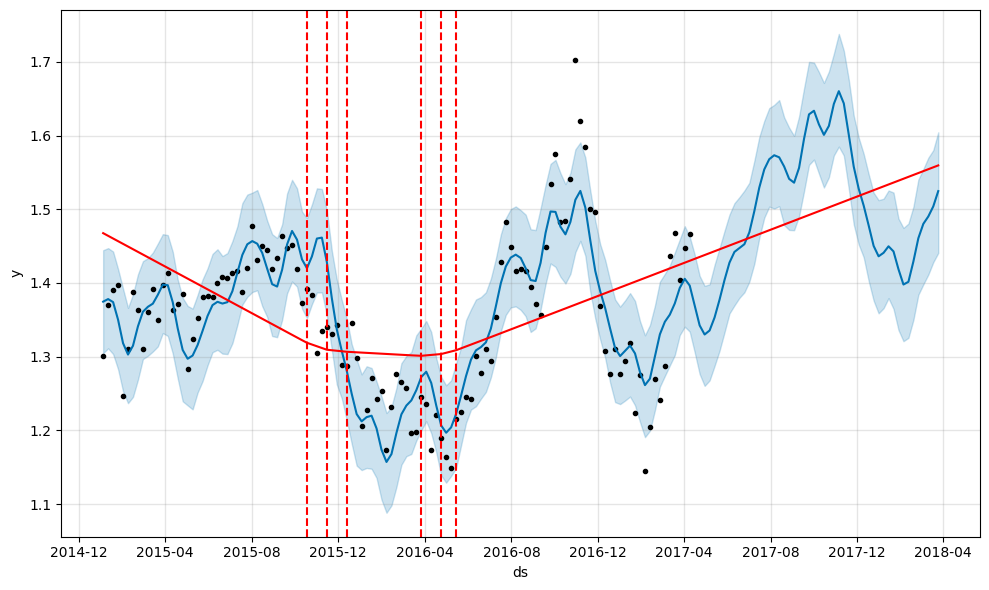

In [141]:
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)
plt.show()

In [142]:
# We can view the dates where the chagepoints occurred
prophet_basic.changepoints

,ds
4,2015-02-01
8,2015-03-01
11,2015-03-22
15,2015-04-19
19,2015-05-17
23,2015-06-14
26,2015-07-05
30,2015-08-02
34,2015-08-30
38,2015-09-27


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmplng8n8/2dip86f1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmplng8n8/euejso1o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65851', 'data', 'file=/tmp/tmpmplng8n8/2dip86f1.json', 'init=/tmp/tmpmplng8n8/euejso1o.json', 'output', 'file=/tmp/tmpmplng8n8/prophet_modelk0capdl_/prophet_model-20250111195020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


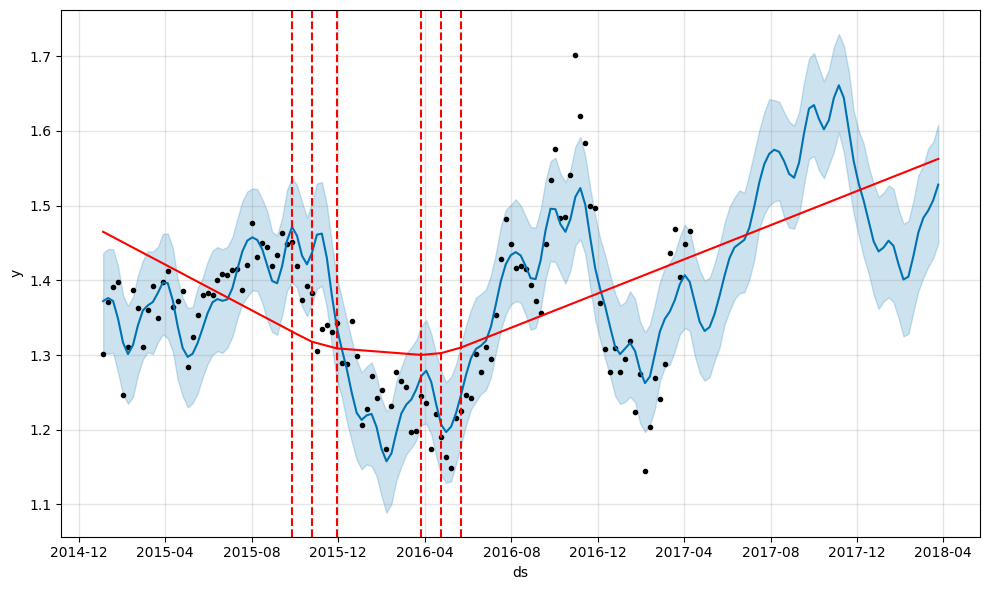

In [143]:
# We can change the inferred changepoint range by setting the changepoint_range
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmplng8n8/buwqg2sk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmplng8n8/pjesc0sn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58948', 'data', 'file=/tmp/tmpmplng8n8/buwqg2sk.json', 'init=/tmp/tmpmplng8n8/pjesc0sn.json', 'output', 'file=/tmp/tmpmplng8n8/prophet_modelq8grhif3/prophet_model-20250111195038.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


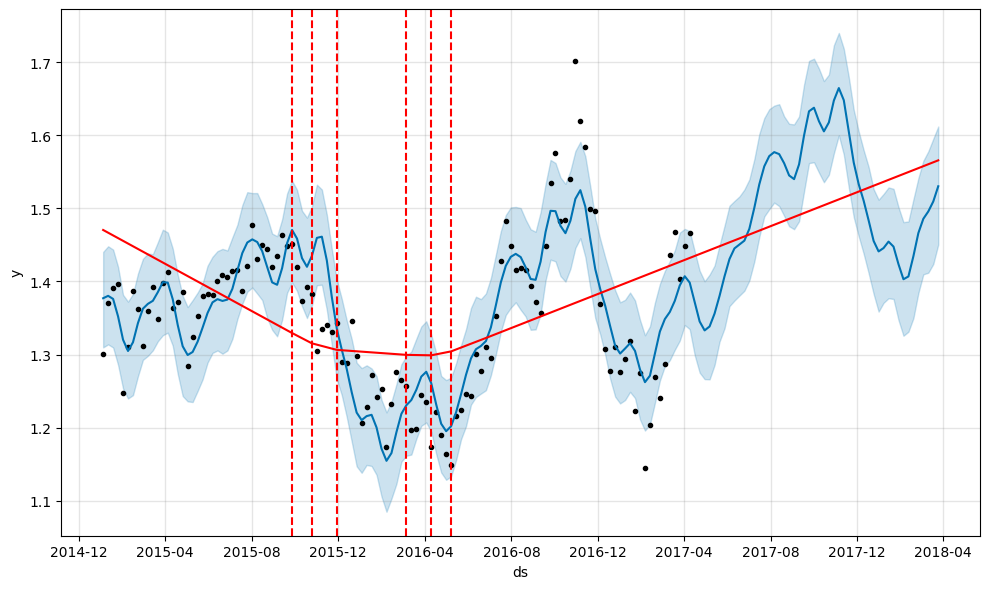

In [144]:
# The number of changepoints can be set by using the n_changepoints parameter when initializing prophet
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)
plt.show()

### Adjusting Trend

Prophet allow you to adjust the trend in case there is an overfit (too much flexibility) or underfit (not enough flexibility).

changepoint_prior_scale helps adjust the strength of the trend. The default value for changepoint_prior_scale is 0.05.

Decrease the value to make the trend less flexible. Increase the value of changepoint_prior_scale to make the trend more flexible.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmplng8n8/0koeyb2a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmplng8n8/yljscuef.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29003', 'data', 'file=/tmp/tmpmplng8n8/0koeyb2a.json', 'init=/tmp/tmpmplng8n8/yljscuef.json', 'output', 'file=/tmp/tmpmplng8n8/prophet_modelodr2ln8a/prophet_model-20250111195042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


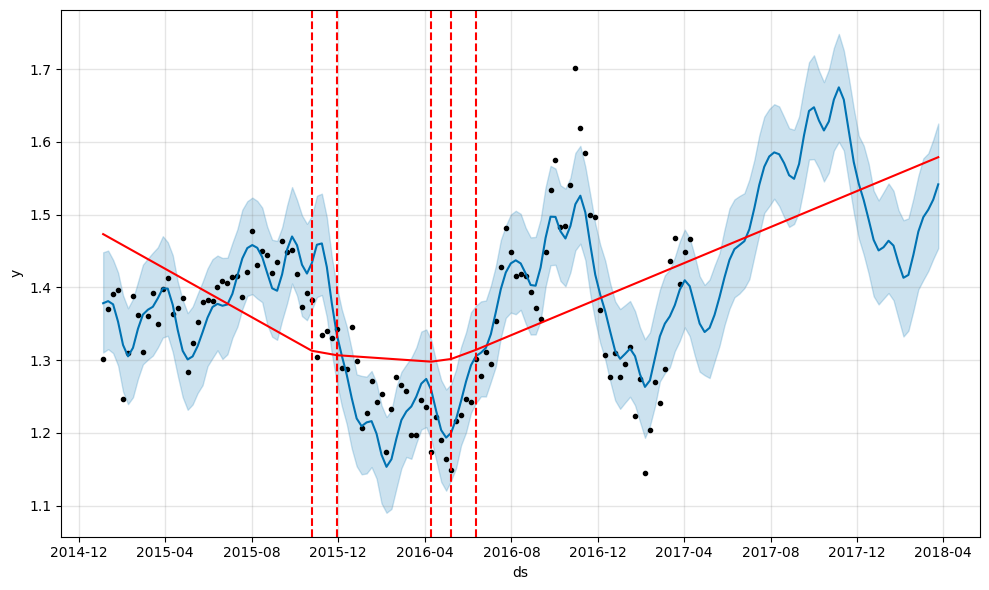

In [145]:
# Increasing the changepoint_prior_scale to 0.08 to make the trend flexible
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmplng8n8/5qy7nu1r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmplng8n8/yx3un04c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57924', 'data', 'file=/tmp/tmpmplng8n8/5qy7nu1r.json', 'init=/tmp/tmpmplng8n8/yx3un04c.json', 'output', 'file=/tmp/tmpmplng8n8/prophet_modelg_lmw879/prophet_model-20250111195045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:50:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:50:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
19:50:45 - cmdstanpy - ERROR - Chain [1]

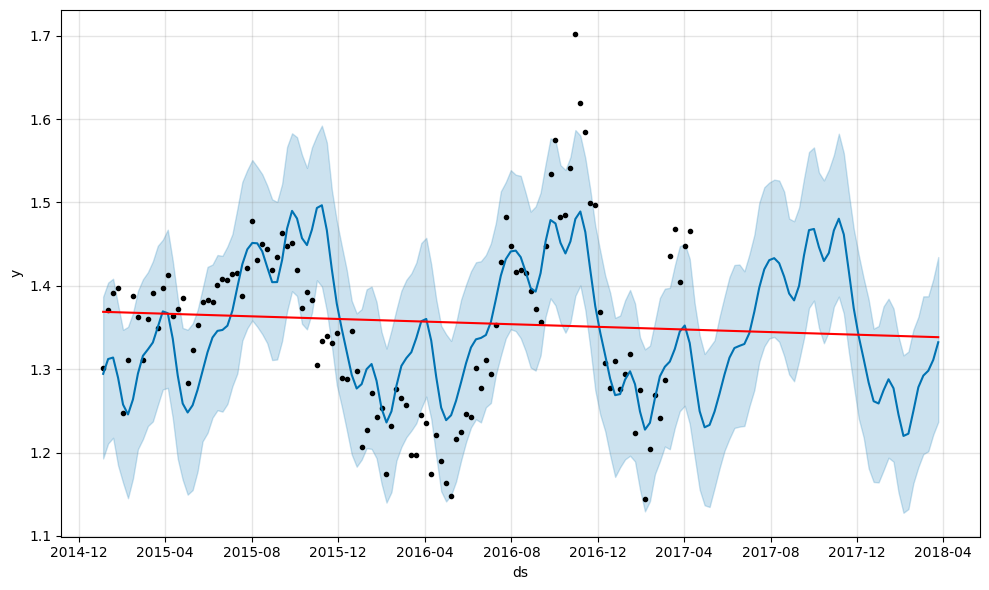

In [146]:
# Decreasing the changepoint_prior_scale to 0.001 to make the trend less flexible
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)
plt.show()

### Adding Holidays

Holidays and events can cause changes to a time series. In our example the National Avocado day on July 31 and Guacamole day on September 16 can impact prices of the Avocado.

We can create a custom holiday list for Prophet by creating a dataframe with two columns ds and holiday. A row for each occurrence of the holiday

In [147]:
avocado_season = pd.DataFrame({
  'holiday': 'avocado season',
  'ds': pd.to_datetime(['2014-07-31', '2014-09-16',
                        '2015-07-31', '2015-09-16',
                        '2016-07-31', '2016-09-16',
                        '2017-07-31', '2017-09-16',
                       '2018-07-31', '2018-09-16',
                        '2019-07-31', '2019-09-16']),
  'lower_window': -1,
  'upper_window': 0,
})

lower window and upper window extend holiday to days around the date. If we want to include a day prior to the national avocado day and Guacamole day, we set lower_window: -1 upper_window: 0

If we wanted to use the day after the holiday then set lower_window: 0 upper_window: 1

In [148]:
avocado_season

,holiday,ds,lower_window,upper_window
0,avocado season,2014-07-31,-1,0
1,avocado season,2014-09-16,-1,0
2,avocado season,2015-07-31,-1,0
3,avocado season,2015-09-16,-1,0
4,avocado season,2016-07-31,-1,0
5,avocado season,2016-09-16,-1,0
6,avocado season,2017-07-31,-1,0
7,avocado season,2017-09-16,-1,0
8,avocado season,2018-07-31,-1,0
9,avocado season,2018-09-16,-1,0


In [149]:
pro_holiday= Prophet(holidays=avocado_season)
pro_holiday.fit(train_dataset)
future_data = pro_holiday.make_future_dataframe(periods=12, freq = 'm')

# forecast the data for future data
forecast_data = pro_holiday.predict(future_data)
fig1 = pro_holiday.plot(forecast_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmplng8n8/u_foy593.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmplng8n8/2tuj8x80.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86668', 'data', 'file=/tmp/tmpmplng8n8/u_foy593.json', 'init=/tmp/tmpmplng8n8/2tuj8x80.json', 'output', 'file=/tmp/tmpmplng8n8/prophet_modelvc6n69g2/prophet_model-20250111195138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:51:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:51:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Adding Multiple Regressors

Additional regressors can be added to the Prophet model. This is done by using add_regressor. Additional regressor column value needs to be present in both the fitting as well as prediction dataframes.

In [150]:
df2_week['type'] = dataset['type']
df2_week['Total Volume'] = dataset['Total Volume']
df2_week['4046'] = dataset['4046']
df2_week['4225'] = dataset['4225']
df2_week['4770'] = dataset['4770']
df2_week['Small Bags'] = dataset['Small Bags']

In [151]:
df2_week.shape

(169, 8)

In [152]:
train_X= df2_week[:-prediction_size]
test_X= df2_week[-prediction_size:]

In [153]:
# Additional Regressor
pro_regressor= Prophet()
pro_regressor.add_regressor('Total Volume')
pro_regressor.add_regressor('4046')
pro_regressor.add_regressor('4225')
pro_regressor.add_regressor('4770')
pro_regressor.add_regressor('Small Bags')

In [154]:
# Fitting the data
pro_regressor.fit(train_X)
future_data = pro_regressor.make_future_dataframe(periods=365)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmplng8n8/hpqbol5j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmplng8n8/j6zfyhor.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42150', 'data', 'file=/tmp/tmpmplng8n8/hpqbol5j.json', 'init=/tmp/tmpmplng8n8/j6zfyhor.json', 'output', 'file=/tmp/tmpmplng8n8/prophet_modelaibb8rs2/prophet_model-20250111195203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:52:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:52:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


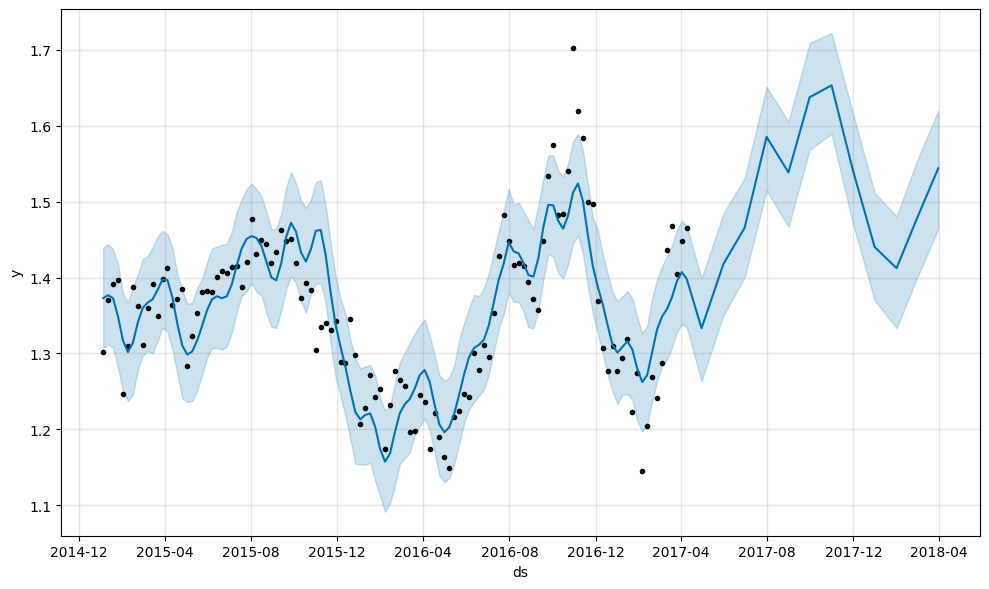

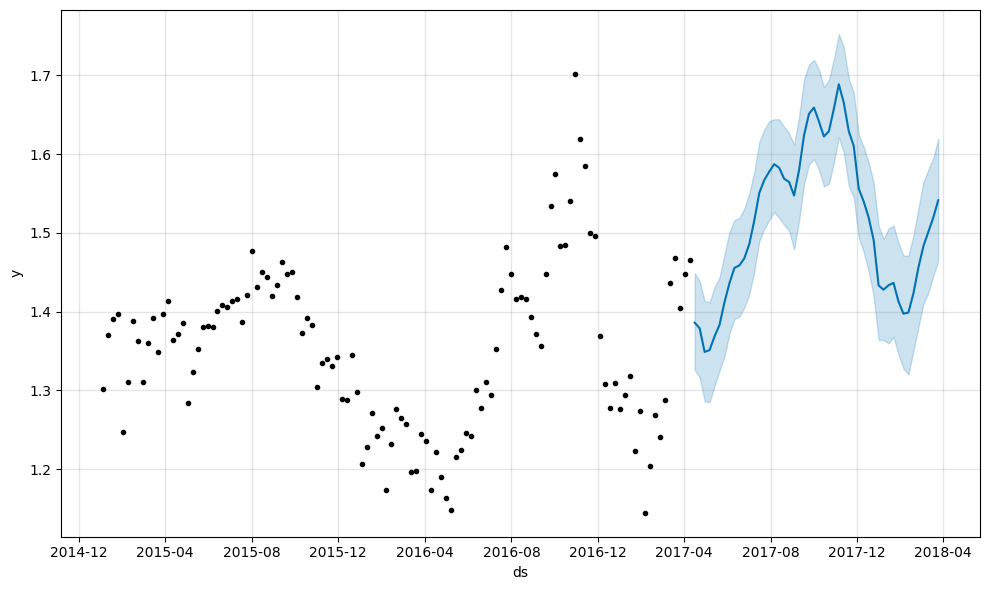

In [155]:
# Forecast the data for test  data
forecast_data = pro_regressor.predict(test_X)
fig1 = pro_regressor.plot(forecast_data)
plt.show()